# MNIST Handwritten Digit Database

This notebook explains my approach to creating a synthetic dataset of digit sequences from the MNIST Handwritten Digit Database.

In [9]:
import os
import sys
import tarfile
import cPickle
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Reading the Data

In [10]:
from sklearn import datasets, preprocessing

mnist = datasets.fetch_mldata('MNIST original')
X, y = mnist.data.astype(float), mnist.target.astype(int)

print(X.shape, y.shape)

((70000, 784), (70000,))


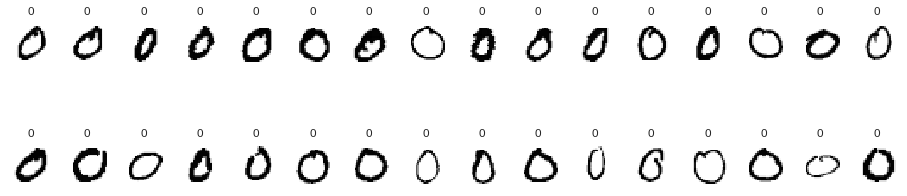

In [11]:
def plot_digits(img, labels, nrows, ncols):
    """Helper function used to display digits"""
    plt.figure(figsize=(min(16, ncols*2), min(16, nrows*2)))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i+1)
        # Reshape every image to a square array 2d array
        sqrt = int(np.sqrt(len(img[i])))
        digit = img[i].reshape(sqrt, sqrt)
        plt.imshow(digit, interpolation='nearest')
        plt.xticks([]); plt.yticks([])
        plt.title(labels[i])
        
plot_digits(X, y, 2, 16)  

Looks like our dataset is ordered by label, let's randomly sort the arrays to view some of the other numbers as well

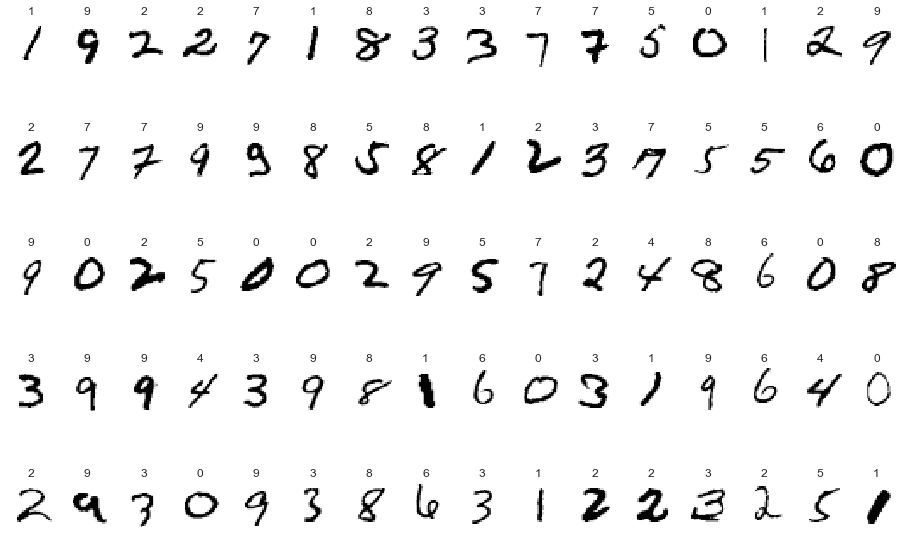

In [12]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=0)

plot_digits(X, y, 5, 16)

That's better. Here we can see some examples of the different digits!

## Synthetic Datasets

Let's create a synthetic dataset consisting of sequences of up to 5 digits using the MNIST dataset